In [1]:
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("askscience_data.csv", index_col=0)
df = df.fillna("")
df

,title,body,tag,datetime,author,score,upvote_ratio,url
0,Post viral cough: why does it get worse after ...,Tl;dr: why is your cough during an upper respi...,Human Body,2022-12-09 02:52:07,CarboniferousCreek,1343.0,0.93,https://www.reddit.com/r/askscience/comments/z...
1,Can an x-ray of an adult show chronic malnouri...,If a person was chronically undernourished thr...,Human Body,2022-12-08 18:28:51,Foxs-In-A-Trenchcoat,426.0,0.91,https://www.reddit.com/r/askscience/comments/z...
2,[META] Bots and AI tools on r/askscience,\n\nOver the past few days we have seen a sur...,META,2022-12-08 09:04:25,AskScienceModerator,2218.0,0.92,https://www.reddit.com/r/askscience/comments/z...
3,Can you predictably manipulate a magnetic gas?,Does there exist a gas that changes in respons...,Physics,2022-12-08 20:01:53,hufsa7,48.0,0.83,https://www.reddit.com/r/askscience/comments/z...
4,Are there cells in humans (or other mammals) t...,,Medicine,2022-12-09 01:11:34,Velym,14.0,0.89,https://www.reddit.com/r/askscience/comments/z...
...,...,...,...,...,...,...,...,...
795,I heard some electron microscopes use gallium....,,Engineering,2022-01-12 17:14:35,Emma_Dale20,6.0,0.70,https://www.reddit.com/r/askscience/comments/s...
796,is the spread of COVID typical for a respirato...,i understand that there's no respiratory virus...,COVID-19,2022-01-12 09:39:55,aggasalk,27.0,0.74,https://www.reddit.com/r/askscience/comments/s...
797,What is the technical difference between Cheek...,What are the technical difference(s) between t...,COVID-19,2022-01-12 14:47:28,h110hawk,3.0,0.67,https://www.reddit.com/r/askscience/comments/s...
798,What starts the coagulation cascade during blo...,I understand that stasis of blood increases th...,Human Body,2022-01-12 14:20:26,joegoldbergg,5.0,0.78,https://www.reddit.com/r/askscience/comments/s...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) 
title = vectorizer.fit_transform(df['title'])
body = vectorizer.fit_transform(df['body'])

X = np.hstack([title.toarray(), body.toarray()])
y = df['score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 7.089868104476668e+33
R^2 Score: -2.373319620441064e+26


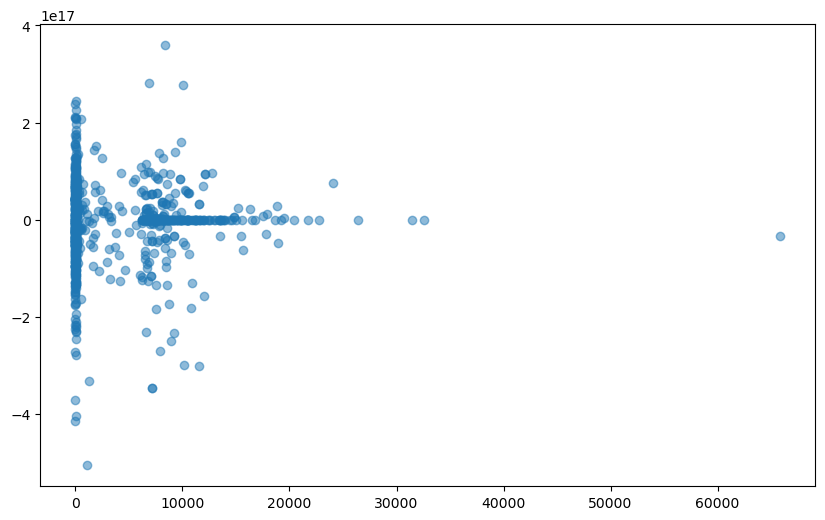

In [6]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.show()

In [7]:
class TFIDFNet(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(TFIDFNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x) 
        return x

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

model = TFIDFNet(input_dim=X.shape[1], hidden_dim1=128, hidden_dim2=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/10, Loss: 45442000.0
Epoch 2/10, Loss: 45441920.0
Epoch 3/10, Loss: 45441848.0
Epoch 4/10, Loss: 45441768.0
Epoch 5/10, Loss: 45441696.0
Epoch 6/10, Loss: 45441612.0
Epoch 7/10, Loss: 45441532.0
Epoch 8/10, Loss: 45441436.0
Epoch 9/10, Loss: 45441340.0
Epoch 10/10, Loss: 45441240.0


In [9]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
r2_score(y_test.numpy(), y_pred.numpy())

-0.45015182083230654

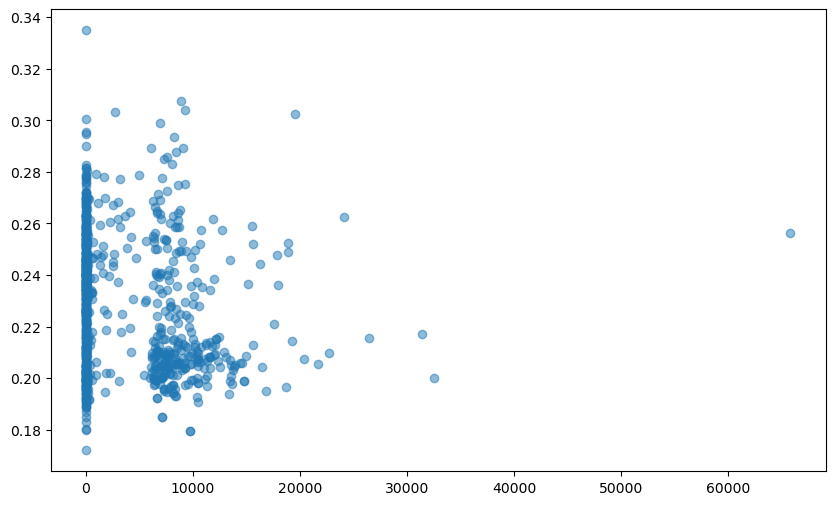

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of words representation of title and body
vectorizer = CountVectorizer()
title = vectorizer.fit_transform(df['title'])
body = vectorizer.fit_transform(df['body'])

X = np.hstack([title.toarray(), body.toarray()])
y = df['score']

In [12]:
class BoWNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BoWNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

model = BoWNet(input_dim=X.shape[1], hidden_dim=128, output_dim=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/10, Loss: 44498140.0
Epoch 2/10, Loss: 44497092.0
Epoch 3/10, Loss: 44495988.0
Epoch 4/10, Loss: 44494788.0
Epoch 5/10, Loss: 44493532.0
Epoch 6/10, Loss: 44492208.0
Epoch 7/10, Loss: 44490824.0
Epoch 8/10, Loss: 44489380.0
Epoch 9/10, Loss: 44487880.0
Epoch 10/10, Loss: 44486312.0


In [14]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
r2_score(y_test.numpy(), y_pred.numpy())

-0.3806163725074254

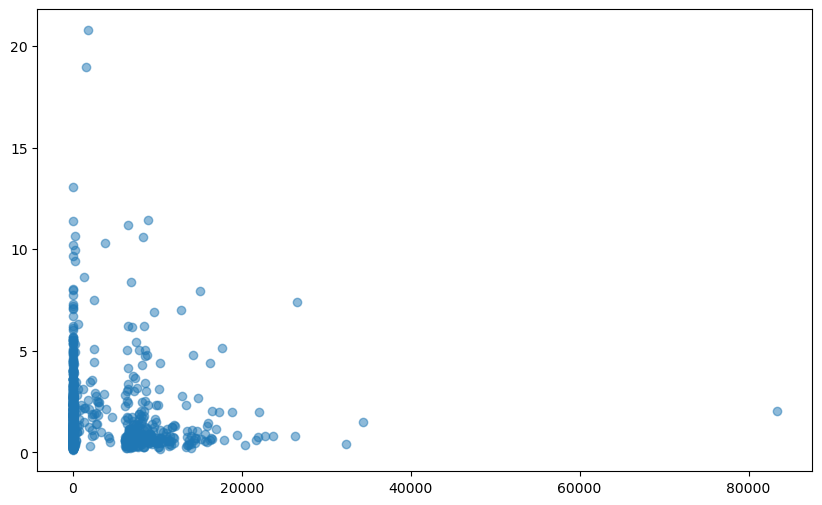

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.show()

In [16]:
from transformers import DistilBertTokenizer, DistilBertModel, AdamW

class TitleBodyDataset(Dataset):
    def __init__(self, titles, bodies, scores, tokenizer, max_length=256):
        self.titles = titles
        self.bodies = bodies
        self.scores = scores
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        title = self.titles[idx]
        body = self.bodies[idx]
        score = self.scores[idx]

        title_encoding = self.tokenizer(title, return_tensors='pt', truncation=True, padding='max_length', max_length=self.max_length)
        body_encoding = self.tokenizer(body, return_tensors='pt', truncation=True, padding='max_length', max_length=self.max_length)

        return (
            title_encoding['input_ids'].squeeze(),
            title_encoding['attention_mask'].squeeze(),
            body_encoding['input_ids'].squeeze(),\
            body_encoding['attention_mask'].squeeze(), 
            score
        )
    

train_df, test_df = train_test_split(df, test_size=0.2)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
dataset = TitleBodyDataset(list(train_df['title']), list(train_df['body']), list(train_df['score']), tokenizer, max_length=256)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [17]:
class CustomDistilBertRegressor(nn.Module):
    def __init__(self):
        super(CustomDistilBertRegressor, self).__init__()
        self.bert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.regressor = nn.Linear(self.bert.config.dim * 2, 1)  # We concatenate title and body features

    def forward(self, title_input_ids, title_attention_mask, body_input_ids, body_attention_mask):
        title_features = self.bert(title_input_ids, title_attention_mask)[0][:, 0]
        body_features = self.bert(body_input_ids, body_attention_mask)[0][:, 0]
        combined = torch.cat((title_features, body_features), dim=1)
        return self.regressor(combined)

model = CustomDistilBertRegressor()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
torch.cuda.empty_cache()

model = model.to(torch.float32).to('cuda')
optimizer = AdamW(model.parameters(), lr=5e-5)

loss_fn = nn.MSELoss()

epochs = 3
for epoch in range(epochs):
    total_loss = 0
    for title_input_ids, title_attention_mask, body_input_ids, body_attention_mask, label in dataloader:
        title_input_ids, title_attention_mask = title_input_ids.to('cuda'), title_attention_mask.to('cuda')
        body_input_ids, body_attention_mask, label = body_input_ids.to('cuda'), body_attention_mask.to('cuda'), label.float().to('cuda')

        optimizer.zero_grad()

        outputs = model(title_input_ids, title_attention_mask, body_input_ids, body_attention_mask)
        loss = loss_fn(outputs.squeeze(-1), label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs} | Avg Loss: {total_loss/len(dataloader)}")


/home/ewest/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3 | Avg Loss: 43230863.264072634
Epoch 2/3 | Avg Loss: 43882548.49056604
Epoch 3/3 | Avg Loss: 44415099.7735849


In [19]:
def evaluate_r2(model, dataloader, device='cuda'):
    model.eval() 
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            title_input_ids, title_attention_mask, body_input_ids, body_attention_mask, labels = [item.to(device) for item in batch]

            outputs = model(title_input_ids, title_attention_mask, body_input_ids, body_attention_mask)
            all_predictions.extend(outputs.squeeze().cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return r2_score(all_labels, all_predictions)

In [20]:
test_dataset = TitleBodyDataset(list(test_df['title']), list(test_df['body']), list(test_df['score']), tokenizer, max_length=256)
test_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
evaluate_r2(model, test_dataloader, device='cuda')

-0.45639579355548743